In [1]:
from fastai.tabular import *

In [2]:
import pandas as pd
from feather import read_dataframe

In [3]:
df = read_dataframe('training_data.feather')

In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,0,0,0,0,0,0,0,0,0,8370
1,0,1,0,0,0,0,0,0,1,1,1,15200
2,0,2,0,0,0,0,0,0,2,0,0,1422
3,0,3,0,0,0,0,0,0,2,2,0,1057
4,1,4,1,1,1,1,1,0,3,0,0,7969


In [5]:
target_col = 'Purchase'
cat_cols = [col for col in df.columns if col != target_col]

In [6]:
for col in cat_cols:
    df[col] = df[col].astype('category')

In [7]:
test_sample = 0.2
test_size = int(df.shape[0] * 0.2)

In [8]:
test_idx = list(np.random.choice(list(range(0, df.shape[0])), test_size, replace=False))

In [23]:
path = '.'

In [24]:
test = TabularList.from_df(df.iloc[test_idx].copy(), path=path, cat_names=cat_cols)

In [25]:
data = (TabularList.from_df(df, path=path, cat_names=cat_cols)
                           .split_by_idx(test_idx)
                           .label_from_df(cols=target_col)
                           .add_test(test)
                           .databunch())

/home/rajkorde/anaconda3/envs/fastai/lib/python3.7/site-packages/fastai/data_block.py:487: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
5512, 14457, 18825, 10530, 22942...
  if getattr(ds, 'warn', False): warn(ds.warn)


In [26]:
data.show_batch(rows=10)

User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,target
4204,445,0,5,1,2,2,1,10,0,0,775
3814,1645,1,5,8,2,3,0,5,8,6,2098
797,597,1,2,20,2,1,0,7,7,9,12146
3724,393,0,3,6,1,3,1,0,10,11,8302
2800,1851,0,2,16,1,0,1,3,14,0,8036
1852,1363,1,4,3,0,3,1,1,3,6,11378
54,1049,0,4,6,2,1,1,9,0,0,1523
1134,1734,1,3,3,2,1,1,4,2,0,6929
2677,1717,1,0,11,1,4,0,4,0,0,8783
115,1823,1,5,5,2,1,1,11,6,0,12890


In [27]:
learn = tabular_learner(data, layers=[200,100], metrics=accuracy)

In [28]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 5.75E-02


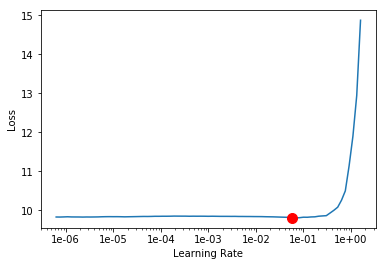

In [29]:
learn.recorder.plot()

In [30]:
learn.fit(2, 1e-2)

epoch,train_loss,valid_loss,accuracy
1,8.616590,8.631050,0.001069
2,8.562606,8.719376,0.001196


In [47]:
row = df.iloc[test_idx]

In [48]:
row.shape

(110013, 12)

In [49]:
row.iloc

In [37]:
learn.predict(row)

KeyError: "None of [Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',\n       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',\n       'Product_Category_2', 'Product_Category_3'],\n      dtype='object')] are in the [columns]"

In [46]:
learn.predict(df.iloc[test_idx])

KeyError: "None of [Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',\n       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',\n       'Product_Category_2', 'Product_Category_3'],\n      dtype='object')] are in the [columns]"